## Learning

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import glob
from collections import OrderedDict

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_X_y

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.externals import joblib

### Setting and utilities

In [2]:
# Select plot setting:
plot = 0

In [3]:
# Select train test setting:

# train_test_setting = 'not_homogeneous'  # Benchmark and MILPlib are separated in train and test
train_test_setting = 'homogeneous'  # Portions of both datasets are used in both train and test
# train_test_setting = 'random'  # All data-points mixed, random split
# train_test_setting = 'miplib_homogeneous'  # Do not use MILPlib Mittellmann, keep same instances together
# train_test_setting = 'miplib_random'  # Do not use MILPlib Mittellmann, mix instances

In [4]:
# Select features setting:
reduced_features = True  # use only some selected features, False for using all of them

In [5]:
# Decide if results are saved:
save_results = True

In [6]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

### Data reading

In [7]:
cwd_backup = os.getcwd()
# print os.path.dirname(os.getcwd())
dat_path = os.path.dirname(os.getcwd()) + '/dat/'
npz_path = os.path.dirname(os.getcwd()) + '/dat/features1_npz' 
# print npz_path
os.chdir(npz_path)
for f in glob.glob('*_Chall*.npz'):
    print(f)
    
os.chdir(cwd_backup)

2_Challenge160_201709013_ft1_label.npz
1_Challenge160_201709013_ft1_label.npz


In [8]:
# os.chdir(npz_path)
# for f in glob.glob('*.npz'):
#     print(f)
    
# os.chdir(cwd_backup)

In [9]:
# Benchmark set

f1 = os.path.join(npz_path, "1_Benchmark78_201709013_ft1_label.npz")
loaded1 = np.load(f1)
data1 = loaded1['data']
cols1 = loaded1['cols']
dec_cols1 = []
for c in cols1:
    dec_cols1.append(c.decode('utf-8'))
df1 = pd.DataFrame(data1, columns=dec_cols1) 
df1['Set'] = 'Benchmark78'
print(data1.shape)

f2 = os.path.join(npz_path, "2_Benchmark78_201709013_ft1_label.npz")
loaded2 = np.load(f2)
data2 = loaded2['data']
cols2 = loaded2['cols']
dec_cols2 = []
for c in cols2:
    dec_cols2.append(c.decode('utf-8'))
df2 = pd.DataFrame(data2, columns=dec_cols2) 
df2['Set'] = 'Benchmark78'
print(data2.shape)

f3 = os.path.join(npz_path, "1_Benchmark78_201805022_ft1_label.npz")
loaded3 = np.load(f3)
data3 = loaded3['data']
cols3 = loaded3['cols']
dec_cols3 = []
for c in cols3:
    dec_cols3.append(c.decode('utf-8'))
df3 = pd.DataFrame(data3, columns=dec_cols3)
df3['Set'] = 'Benchmark78'
print(data3.shape)

f4 = os.path.join(npz_path, "2_Benchmark78_201805022_ft1_label.npz")
loaded4 = np.load(f4)
data4 = loaded4['data']
cols4 = loaded4['cols']
dec_cols4 = []
for c in cols4:
    dec_cols4.append(c.decode('utf-8'))
df4 = pd.DataFrame(data4, columns=dec_cols4)
df4['Set'] = 'Benchmark78'
print(data4.shape)

f5 = os.path.join(npz_path, "1_Benchmark78_201805221_ft1_label.npz")
loaded5 = np.load(f5)
data5 = loaded5['data']
cols5 = loaded5['cols']
dec_cols5 = []
for c in cols5:
    dec_cols5.append(c.decode('utf-8'))
df5 = pd.DataFrame(data5, columns=dec_cols5)
df5['Set'] = 'Benchmark78'
print(data5.shape)

f6 = os.path.join(npz_path, "2_Benchmark78_201805221_ft1_label.npz")
loaded6 = np.load(f6)
data6 = loaded6['data']
cols6 = loaded6['cols']
dec_cols6 = []
for c in cols6:
    dec_cols6.append(c.decode('utf-8'))
df6 = pd.DataFrame(data6, columns=dec_cols6)
df6['Set'] = 'Benchmark78'
print(data6.shape)


(126, 127)
(84, 127)
(126, 127)
(84, 127)
(129, 127)
(84, 127)


In [10]:
df1.columns

Index(['LabelTime', 'ChunkNum', 'LastData_1', 'LastData_2', 'LastData_3',
       'LastData_4', 'LastData_5', 'LastData_6', 'LastData_7', 'LastData_8',
       ...
       'OpenNodes_11', 'OpenNodes_12', 'OpenNodes_13', 'OpenNodes_14',
       'OpenNodes_15', 'OpenNodes_16', 'Time_1', 'Time_2', 'Label', 'Set'],
      dtype='object', length=128)

In [11]:
# MILPlib

f7 = os.path.join(npz_path, "1_MILPlib_Mittelmann_201709013_ft1_label.npz")
loaded7 = np.load(f7)
data7 = loaded7['data']
cols7 = loaded7['cols']
dec_cols7 = []
for c in cols7:
    dec_cols7.append(c.decode('utf-8'))
df7 = pd.DataFrame(data7, columns=dec_cols7)
df7['Set'] = 'MILPlib'
print(data7.shape)

f8 = os.path.join(npz_path, "2_MILPlib_Mittelmann_201709013_ft1_label.npz")
loaded8 = np.load(f8)
data8 = loaded8['data']
cols8 = loaded8['cols']
dec_cols8 = []
for c in cols8:
    dec_cols8.append(c.decode('utf-8'))
df8 = pd.DataFrame(data8, columns=dec_cols8)
df8['Set'] = 'MILPlib'
print(data8.shape)

f9 = os.path.join(npz_path, "1_MILPlib_Mittelmann_201805022_ft1_label.npz")
loaded9 = np.load(f9)
data9 = loaded9['data']
cols9 = loaded9['cols']
dec_cols9 = []
for c in cols9:
    dec_cols9.append(c.decode('utf-8'))
df9 = pd.DataFrame(data9, columns=dec_cols9)
df9['Set'] = 'MILPlib'
print(data9.shape)

f10 = os.path.join(npz_path, "2_MILPlib_Mittelmann_201805022_ft1_label.npz")
loaded10 = np.load(f10)
data10 = loaded10['data']
cols10 = loaded10['cols']
dec_cols10 = []
for c in cols10:
    dec_cols10.append(c.decode('utf-8'))
df10 = pd.DataFrame(data10, columns=dec_cols10)
df10['Set'] = 'MILPlib'
print(data10.shape)

f11 = os.path.join(npz_path, "1_MILPlib_Mittelmann_201805221_ft1_label.npz")
loaded11 = np.load(f11)
data11 = loaded11['data']
cols11 = loaded11['cols']
dec_cols11 = []
for c in cols11:
    dec_cols11.append(c.decode('utf-8'))
df11 = pd.DataFrame(data11, columns=dec_cols11)
df11['Set'] = 'MILPlib'
print(data11.shape)

f12 = os.path.join(npz_path, "2_MILPlib_Mittelmann_201805221_ft1_label.npz")
loaded12 = np.load(f12)
data12 = loaded12['data']
cols12 = loaded12['cols']
dec_cols12 = []
for c in cols12:
    dec_cols12.append(c.decode('utf-8'))
df12 = pd.DataFrame(data12, columns=dec_cols12)
df12['Set'] = 'MILPlib'
print(data12.shape)


(57, 127)
(42, 127)
(54, 127)
(42, 127)
(57, 127)
(36, 127)


In [12]:
# Challenge

f13 = os.path.join(npz_path, "1_Challenge160_201709013_ft1_label.npz")
loaded13 = np.load(f13)
data13 = loaded13['data']
cols13 = loaded13['cols']
dec_cols13 = []
for c in cols13:
    dec_cols13.append(c.decode('utf-8'))
df13 = pd.DataFrame(data13, columns=dec_cols13)
df13['Set'] = 'Challenge160'
print(df13.shape)

f14 = os.path.join(npz_path, "2_Challenge160_201709013_ft1_label.npz")
loaded14 = np.load(f14)
data14 = loaded14['data']
cols14 = loaded14['cols']
dec_cols14 = []
for c in cols14:
    dec_cols14.append(c.decode('utf-8'))
df14 = pd.DataFrame(data14, columns=dec_cols14)
df14['Set'] = 'Challenge160'
print(df14.shape)

(202, 128)
(192, 128)


### Create training and test sets

Compose training and test set depending on `train_test_setting`:

In [13]:
if train_test_setting == 'miplib_homogeneous':
    
    df = pd.concat([df1, df3, df5, df13], axis=0, ignore_index=True)  # training set
    df_test = pd.concat([df2, df4, df6, df14], axis=0, ignore_index=True)  # test set
#     df.columns = df.columns.str.decode('utf-8') 
#     df_test.columns = df_test.columns.str.decode('utf-8') 
    
    if plot == 1:
        df.Label.hist()
        plt.title('Total training set')
        plt.savefig('01hist_training_nothom.png')
        df_test.Label.hist()
        plt.title('Total test set')
        plt.savefig('01hist_test_nothom.png')
        
    print("Setting: {}".format(train_test_setting))
    print("Training shape: {}".format(df.shape))
    print("Test shape: {}".format(df_test.shape))
    print("Label split (#0, #1): ")
    print("\t({}, {})".format(df.loc[df['Label']==0].shape[0], df.loc[df['Label']==1].shape[0]))
    print("\t({}, {})".format(df_test.loc[df_test['Label']==0].shape[0], df_test.loc[df_test['Label']==1].shape[0]))
    

if train_test_setting == 'miplib_random':
    df_all  = pd.concat([df1, df2, df3, df4, df5, df6, df13, df14], 
                        axis=0, ignore_index=True)
    df_label_all = df_all['Label']
    df_ft_all = df_all.drop(['Label'], axis=1)
    df_ft, df_ft_test, df_label, df_label_test = train_test_split(df_ft_all, df_label_all, 
                                                                  test_size=0.4, random_state=123)
    
    df = pd.concat([df_ft, df_label], axis=1)
    df_test = pd.concat([df_ft_test, df_label_test], axis=1)
#     df.columns = df.columns.str.decode('utf-8') 
#     df_test.columns = df_test.columns.str.decode('utf-8') 
    
    if plot == 1:
        df.Label.hist()
        plt.title('Total training set')
        plt.savefig('01hist_training_random.png')
        df_test.Label.hist()
        plt.title('Total test set')
        plt.savefig('01hist_test_random.png')
        
    print("Setting: {}".format(train_test_setting))
    print("Training shape: {}".format(df.shape))
    print("Test shape: {}".format(df_test.shape))
    print("Label split (#0, #1): ")
    print("\t({}, {})".format(df.loc[df['Label']==0].shape[0], df.loc[df['Label']==1].shape[0]))
    print("\t({}, {})".format(df_test.loc[df_test['Label']==0].shape[0], df_test.loc[df_test['Label']==1].shape[0]))


if train_test_setting == 'not_homogeneous':
    
    df = pd.concat([df1, df2, df3, df4, df5, df6, df13], axis=0, ignore_index=True)  # training set
    df_test = pd.concat([df7, df8, df9, df10, df11, df12, df14], axis=0, ignore_index=True)  # test set
#     df.columns = df.columns.str.decode('utf-8') 
#     df_test.columns = df_test.columns.str.decode('utf-8') 
    
    if plot == 1:
        df.Label.hist()
        plt.title('Total training set')
        plt.savefig('01hist_training_nothom.png')
        df_test.Label.hist()
        plt.title('Total test set')
        plt.savefig('01hist_test_nothom.png')
        
    print("Setting: {}".format(train_test_setting))
    print("Training shape: {}".format(df.shape))
    print("Test shape: {}".format(df_test.shape))
    print("Label split (#0, #1): ")
    print("\t({}, {})".format(df.loc[df['Label']==0].shape[0], df.loc[df['Label']==1].shape[0]))
    print("\t({}, {})".format(df_test.loc[df_test['Label']==0].shape[0], df_test.loc[df_test['Label']==1].shape[0]))

elif train_test_setting == 'homogeneous':
    
    df = pd.concat([df1, df3, df5, df7, df9, df11, df13], axis=0, ignore_index=True)  # training set
    df_test = pd.concat([df2, df4, df6, df8, df10, df12, df14], axis=0, ignore_index=True)  # test set
#     df.columns = df.columns.str.decode('utf-8') 
#     df_test.columns = df_test.columns.str.decode('utf-8') 
    
    if plot == 1:
        df.Label.hist()
        plt.title('Total training set')
        plt.savefig('01hist_training_homoge.png')
        df_test.Label.hist()
        plt.title('Total test set')
        plt.savefig('01hist_test_homoge.png')
        
    print("Setting: {}".format(train_test_setting))
    print("Training shape: {}".format(df.shape))
    print("Test shape: {}".format(df_test.shape))
    print("Label split (#0, #1): ")
    print("\t({}, {})".format(df.loc[df['Label']==0].shape[0], df.loc[df['Label']==1].shape[0]))
    print("\t({}, {})".format(df_test.loc[df_test['Label']==0].shape[0], df_test.loc[df_test['Label']==1].shape[0]))
    
elif train_test_setting == 'random':
    
    df_all  = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14], 
                        axis=0, ignore_index=True)
    df_label_all = df_all['Label']
    df_ft_all = df_all.drop(['Label'], axis=1)
    df_ft, df_ft_test, df_label, df_label_test = train_test_split(df_ft_all, df_label_all, 
                                                                  test_size=0.4, random_state=123)
    
    df = pd.concat([df_ft, df_label], axis=1)
    df_test = pd.concat([df_ft_test, df_label_test], axis=1)
#     df.columns = df.columns.str.decode('utf-8') 
#     df_test.columns = df_test.columns.str.decode('utf-8') 
    
    if plot == 1:
        df.Label.hist()
        plt.title('Total training set')
        plt.savefig('01hist_training_random.png')
        df_test.Label.hist()
        plt.title('Total test set')
        plt.savefig('01hist_test_random.png')
        
    print("Setting: {}".format(train_test_setting))
    print("Training shape: {}".format(df.shape))
    print("Test shape: {}".format(df_test.shape))
    print("Label split (#0, #1): ")
    print("\t({}, {})".format(df.loc[df['Label']==0].shape[0], df.loc[df['Label']==1].shape[0]))
    print("\t({}, {})".format(df_test.loc[df_test['Label']==0].shape[0], df_test.loc[df_test['Label']==1].shape[0]))

Setting: homogeneous
Training shape: (751, 128)
Test shape: (564, 128)
Label split (#0, #1): 
	(277, 474)
	(235, 329)


In [14]:
df.head(3)

,LabelTime,ChunkNum,LastData_1,LastData_2,LastData_3,LastData_4,LastData_5,LastData_6,LastData_7,LastData_8,...,OpenNodes_11,OpenNodes_12,OpenNodes_13,OpenNodes_14,OpenNodes_15,OpenNodes_16,Time_1,Time_2,Label,Set
0,3600.0,4.0,1.307069,179.834395,157.0,11462.0,11459.000000,2092883.0,0.000262,1.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,405.797494,10394.202511,1.0,Benchmark78
1,2400.0,3.0,1.984848,2.425926,270.0,260.0,259.500000,380071.0,0.001923,1.0,...,0.0,NaN,-1.0,0.0,0.0,NaN,364.252018,10435.747989,1.0,Benchmark78
2,3600.0,4.0,0.477915,6.947368,95.0,423.0,419.362911,124984.0,0.008598,1.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,58.954801,10741.045204,1.0,Benchmark78


### Analyze label split wrt dataset of origin

In [15]:
# frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14]

In [16]:
df_all  = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14], 
                        axis=0, ignore_index=True)
# df_all.columns = df_all.columns.str.decode('utf-8') 
print(df_all.shape)

(1315, 128)


In [17]:
'Set' in df_all.columns

True

In [18]:
print(df_all.loc[df_all['Label']==1].shape)
print(df_all.loc[df_all['Label']==0].shape)

(803, 128)
(512, 128)


In [19]:
512*100./1315

38.93536121673004

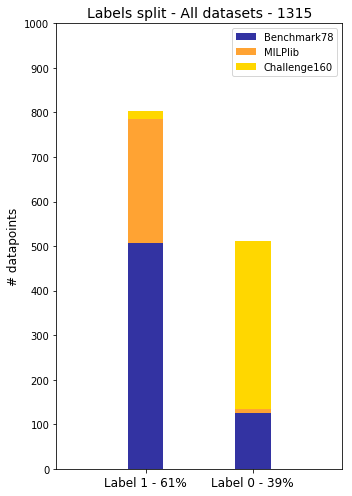

In [20]:
fig = plt.figure(figsize=(5, 7))

N = 2

benchmark_labels = (df_all.loc[(df_all['Label']==1) & (df_all['Set'] == 'Benchmark78')].shape[0], 
                    df_all.loc[(df_all['Label']==0) & (df_all['Set'] == 'Benchmark78')].shape[0])

milplib_labels = (df_all.loc[(df_all['Label']==1) & (df_all['Set'] == 'MILPlib')].shape[0], 
                  df_all.loc[(df_all['Label']==0) & (df_all['Set'] == 'MILPlib')].shape[0])

challenge_labels = (df_all.loc[(df_all['Label']==1) & (df_all['Set'] == 'Challenge160')].shape[0], 
                    df_all.loc[(df_all['Label']==0) & (df_all['Set'] == 'Challenge160')].shape[0])

ind = [0.25, 0.55]    # the x locations for the groups
width = 0.1       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, benchmark_labels, width, align='center', alpha=.8, color='darkblue')
p2 = plt.bar(ind, milplib_labels, width, bottom=benchmark_labels, align='center', color='darkorange', alpha=.8)
p3 = plt.bar(ind, challenge_labels, width, bottom=np.array(milplib_labels)+np.array(benchmark_labels), align='center', 
             color='gold')

plt.ylabel('# datapoints', fontsize=12)
plt.title('Labels split - All datasets - 1315', fontsize=14)
plt.xticks(ind, ('Label 1 - 61%', 'Label 0 - 39%'), fontsize=12)
plt.xlim((-.5, 1.5))
plt.yticks(np.arange(0, 1001, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Benchmark78', 'MILPlib', 'Challenge160'))

plt.tight_layout()
plt.xlim((0,.8))
plt.tight_layout()
# plt.savefig('label_bench_milplib_challenge_1315')

plt.show()

### Additional features

- `Incumbent_A1` = `Incumbent_1`/`Depth_8`: # of incumbent updates over total number of branched nodes
- `Incumbent_A5` = `Incumbent_5`/`LastData_4`: average incumbent improvement over incumbent value
- `Incumbent_A9` = `Incumbent_9`/`Depth_8`: average distance between incumbent updates over total number of branched nodes
- `Incumbent_A10` = `Incumbent_10`/`Incumbent_9`: distance from last update over average update distance


- `BestBound_A1` = `BestBound_1`/`Depth_8`: # of best bound updates over total number of branched nodes
- `BestBound_A5` = `BestBound_5`/`LastData_5`: average best bound improvement over best bound value
- `BestBound_A9` = `BestBound_9`/`Depth_8`: average distance between best bound updates over total number of branched nodes
- `BestBound_A10` = `BestBound_10`/`BestBound_9`: distance from last update over average update distance


- `Depth_A1` = `Depth_1`/`LastData_9`: max depth over total number of processed nodes
- `Depth_A2` = `Depth_2`/`Depth_1`: last full level over max depth


- `Dives_A4` = `Dives_4`/`Depth_8`: # of changes in depth over total number of branched nodes

In [21]:
df['Incumbent_A1'] = df['Incumbent_1']/df['Depth_8']
df['Incumbent_A5'] = df['Incumbent_5']/df['LastData_4']
df['Incumbent_A9'] = df['Incumbent_9']/df['Depth_8']
df['Incumbent_A10'] = df['Incumbent_10']/df['Incumbent_9']

df_test['Incumbent_A1'] = df_test['Incumbent_1']/df_test['Depth_8']
df_test['Incumbent_A5'] = df_test['Incumbent_5']/df_test['LastData_4']
df_test['Incumbent_A9'] = df_test['Incumbent_9']/df_test['Depth_8']
df_test['Incumbent_A10'] = df_test['Incumbent_10']/df_test['Incumbent_9']

In [22]:
df['BestBound_A1'] = df['BestBound_1']/df['Depth_8']
df['BestBound_A5'] = df['BestBound_5']/df['LastData_5']
df['BestBound_A9'] = df['BestBound_9']/df['Depth_8']
df['BestBound_A10'] = df['BestBound_10']/df['BestBound_9']

df_test['BestBound_A1'] = df_test['BestBound_1']/df_test['Depth_8']
df_test['BestBound_A5'] = df_test['BestBound_5']/df_test['LastData_5']
df_test['BestBound_A9'] = df_test['BestBound_9']/df_test['Depth_8']
df_test['BestBound_A10'] = df_test['BestBound_10']/df_test['BestBound_9']

In [23]:
df['Depth_A1'] = df['Depth_1']/df['LastData_9']
df['Depth_A2'] = df['Depth_2']/df['Depth_1']

df_test['Depth_A1'] = df_test['Depth_1']/df_test['LastData_9']
df_test['Depth_A2'] = df_test['Depth_2']/df_test['Depth_1']

In [24]:
df['Dives_A4'] = df['Dives_4']/df['Depth_8']

df_test['Dives_A4'] = df_test['Dives_4']/df_test['Depth_8']

In [25]:
print("Training shape: {}".format(df.shape))
print("Test shape: {}".format(df_test.shape))

Training shape: (751, 139)
Test shape: (564, 139)


In [26]:
print("Full columns list: (len {}) ".format(len(df.columns.tolist())))
print(df.columns.tolist())

Full columns list: (len 139) 
['LabelTime', 'ChunkNum', 'LastData_1', 'LastData_2', 'LastData_3', 'LastData_4', 'LastData_5', 'LastData_6', 'LastData_7', 'LastData_8', 'LastData_9', 'LastData_10', 'LastData_11', 'LastData_12', 'LastData_13', 'LastData_14', 'LastData_15', 'LastData_16', 'LastData_17', 'LastData_18', 'LastData_19', 'LastData_20', 'LastData_21', 'LastData_22', 'LastData_23', 'LastData_24', 'Pruned_1', 'Pruned_2', 'Pruned_3', 'NodesLeft_1', 'NodesLeft_2', 'NodesLeft_3', 'NodesLeft_4', 'NodesLeft_5', 'NodesLeft_6', 'Iinf_1', 'Iinf_2', 'Iinf_3', 'Iinf_4', 'Iinf_5', 'Iinf_6', 'Iinf_7', 'ItCnt_1', 'IntFeas_1', 'IntFeas_2', 'IntFeas_3', 'Incumbent_1', 'Incumbent_2', 'Incumbent_3', 'Incumbent_4', 'Incumbent_5', 'Incumbent_6', 'Incumbent_7', 'Incumbent_8', 'Incumbent_9', 'Incumbent_10', 'BestBound_1', 'BestBound_2', 'BestBound_3', 'BestBound_4', 'BestBound_5', 'BestBound_6', 'BestBound_7', 'BestBound_8', 'BestBound_9', 'BestBound_10', 'Objective_1', 'Objective_2', 'Objective_3', 

### Basic cleaning

(for both training and test sets)

0. Fix the columns that can be transformed
1. Remove invalid ones (those with too many `nan` and `inf`)
2. Select columns for experiments
3. Remove single rows with invalid data

In this way, the final shape of the dataset (# datapoints) depends on which columns where selected)

In [27]:
# 1. Transform nans to 0
# This is done for those columns representing slopes

cols_nan_to_0 = ['NodesLeft_3', 'NodesLeft_4', 'NodesLeft_5', 'NodesLeft_6', 
                 'OpenNodes_1', 'OpenNodes_2', 'OpenNodes_3', 'OpenNodes_4', 
                 'OpenNodes_5', 'OpenNodes_6', 'OpenNodes_7', 'OpenNodes_8', 
                 'OpenNodes_9', 'OpenNodes_10', 'OpenNodes_11', 'OpenNodes_12', 
                 'OpenNodes_13', 'OpenNodes_14', 'OpenNodes_15', 'OpenNodes_16']

# print df[cols_nan_to_0].isnull().sum()

for col in cols_nan_to_0:
    df[col].fillna(0, inplace=True)
    df_test[col].fillna(0, inplace=True)

# print df[cols_nan_to_0].isnull().sum()

In [28]:
# 2. Remove invalid columns

cols_invalid = ['Iinf_7', 'BestBound_6', 'Depth_6', 'Integral_1']

df.drop(cols_invalid, axis=1, inplace=True)
df_test.drop(cols_invalid, axis=1, inplace=True)

Select columns for experiments, depending on `reduced_features`:

In [29]:
# 3. Select columns for experiments

if reduced_features:
    
    cols_to_keep = ['LastData_7', 'LastData_12', 
                'LastData_17', 'LastData_18', 'LastData_19', 'LastData_20', # 'LastData_21', 
                'Pruned_2', 'Pruned_3', 
                'NodesLeft_2',
                'Iinf_1', 'Iinf_2', 'Iinf_3', 'Iinf_5',
                'ItCnt_1', 
                'IntFeas_2',
                'Incumbent_2', 'Incumbent_A5', 'Incumbent_A9', 'Incumbent_A10', 
                'BestBound_2', 'BestBound_A5', 'BestBound_A9', 'BestBound_A10', 
                'Objective_3', 'Objective_5', 'Objective_6', 
                'FixedVars_1', 'FixedVars_2', 'FixedVars_4', 'FixedVars_6', 
                'Depth_A1', 'Depth_A2', 'Depth_5', 
                'Dives_1', 'Dives_3', 'Dives_A4', 
                'Integral_2', 
                'Label']
    
    df = df[cols_to_keep]
    df_test = df_test[cols_to_keep]
    
    print("# of features selected: {}".format(len(cols_to_keep) -1))
    print(df.shape)
    print(df_test.shape)
    
else:
    
    cols_to_keep = df.columns.tolist()
    
    print("# of features selected: {}".format(len(cols_to_keep) -1))
    print(df.shape)
    print(df_test.shape)
    
df.head(3)

# of features selected: 37
(751, 38)
(564, 38)


,LastData_7,LastData_12,LastData_17,LastData_18,LastData_19,LastData_20,Pruned_2,Pruned_3,NodesLeft_2,Iinf_1,...,FixedVars_4,FixedVars_6,Depth_A1,Depth_A2,Depth_5,Dives_1,Dives_3,Dives_A4,Integral_2,Label
0,0.000262,0.999738,0.007143,0.007143,0.999909,0.994272,0.346651,47.694268,0.0,0.159448,...,0.049809,0.000000,0.005324,0.008696,0.321739,34.0,0.005031,0.092249,18.440365,1.0
1,0.001923,0.998077,0.008000,0.004000,1.005769,0.992352,0.003030,0.003704,1.0,0.035931,...,0.051515,0.000000,0.530303,0.000000,0.462857,1.0,0.306991,0.003030,289.042487,1.0
2,0.008598,0.991402,1.000000,1.000000,0.999805,1.000000,0.440985,6.410526,0.0,0.540000,...,0.046572,0.011643,0.013034,0.277778,0.444444,5.0,0.012953,0.170763,6.173361,1.0


In [30]:
# 4. Clean-up single rows with NaNs

df = clean_dataset(df)
df_test = clean_dataset(df_test)

print("Final shape of training: {}".format(df.shape))
print("Final shape of test: {}".format(df_test.shape))
print("Total # datapoints: {}".format(df.shape[0] + df_test.shape[0]))
print("Label split (#0, #1): ")
print("\t({}, {})".format(df.loc[df['Label']==0].shape[0], df.loc[df['Label']==1].shape[0]))
print("\t({}, {})".format(df_test.loc[df_test['Label']==0].shape[0], df_test.loc[df_test['Label']==1].shape[0]))

Final shape of training: (594, 38)
Final shape of test: (376, 38)
Total # datapoints: 970
Label split (#0, #1): 
	(198, 396)
	(136, 240)


In [31]:
# print(df.loc[df['Label']==1].shape, df.loc[df['Label']==0].shape)
# print(df_test.loc[df_test['Label']==1].shape, df_test.loc[df_test['Label']==0].shape)

Eventually set up results folder:

In [32]:
if save_results:
    setting_info = train_test_setting+'_ft_'+str(len(cols_to_keep)-1)         
    results_path = dat_path + 'py35_results_'+setting_info 
    try:
        os.mkdir(results_path)
    except OSError:
        if not os.path.isdir(results_path):
            raise

    print("Created results folder: {}".format(results_path))
    os.chdir(results_path)
    
    joblib.dump(cols_to_keep, 'features_list.pkl')

Created results folder: /Users/giuliazarpellon/GitProjects/GAP_prediction/dat/py35_results_homogeneous_ft_37


### Features correlation

- Features `LastData8`, `NodesLeft_1` and `IntFeas_1` appear to assume always the same value. We remove it from the dataset.

- As expected, `Incumbent_A1` and `Incumbent_2` (as `BestBound_A1` and `BestBound_2`) are very much correlated. We only keep one of the two.

We will then work with 40 features.

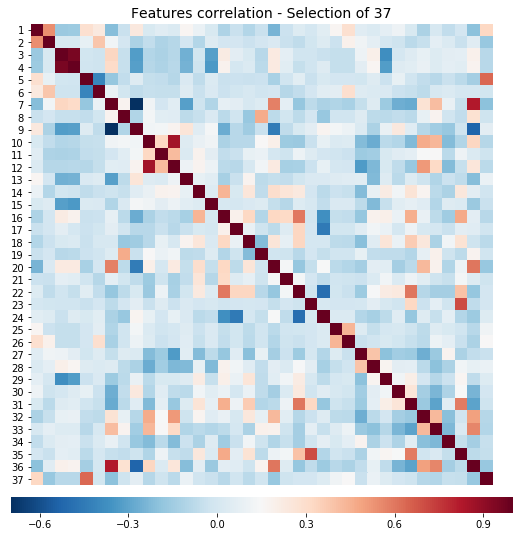

In [33]:
grid_kws = {"height_ratios": (1.5, .05), "hspace": .05}
fig, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(9,9))

corr = df.drop(['Label'], axis=1).corr()
ax = sns.heatmap(corr, ax=ax, square=True, cmap="RdBu_r", xticklabels=False, yticklabels=range(1,len(cols_to_keep)),
                 cbar=True, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})

ax.set_title("Features correlation - Selection of "+ str(len(cols_to_keep)-1), fontsize=14)

if save_results:
    plt.savefig('ft_correlation.png')

### Define and train ML models

In [34]:
X_train = df.drop(['Label'], axis=1)
X_train = X_train.astype(np.float64)

y_train = df.as_matrix(columns=['Label'])
y_train = y_train.astype(np.float64)

X_test = df_test.drop(['Label'], axis=1)
X_test = X_test.astype(np.float64)

y_test = df_test.as_matrix(columns=['Label'])
y_test = y_test.astype(np.float64)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(594, 37) (594, 1)
(376, 37) (376, 1)


/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [42]:
X_train.iloc[0].values

array([2.61734427e-04, 9.99738266e-01, 7.14285714e-03, 7.14285714e-03,
       9.99909063e-01, 9.94272228e-01, 3.46650618e-01, 4.76942675e+01,
       0.00000000e+00, 1.59448187e-01, 0.00000000e+00, 5.32408566e-02,
       4.85333711e-02, 9.60000000e+01, 1.00000000e+00, 6.48118143e-04,
       2.31202144e-06, 6.77797121e-02, 7.11864407e-01, 9.73566039e-02,
       7.64942814e-06, 4.03615125e-04, 1.05325543e+00, 5.00212555e-02,
       2.78147483e+02, 2.81147483e+02, 8.80333654e-01, 1.77414180e-01,
       4.98087006e-02, 0.00000000e+00, 5.32382760e-03, 8.69565217e-03,
       3.21739130e-01, 3.40000000e+01, 5.03082265e-03, 9.22488309e-02,
       1.84403649e+01])

In [46]:
y_train[0]

1.0

In [43]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [44]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(594, 37) (594,)
(376, 37) (376,)


In [40]:
# Neural networks and SVM are sensitive to feature scaling, 
# hence we scale all features to have mean 0 and standard deviation 1

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data (train and test)
#X_test_no_transform = X_test.copy()
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Scaler object is saved for future points
if save_results:
    joblib.dump(scaler, 'scaler.pkl')

In [41]:
models = OrderedDict()
models['dummy_class'] = DummyClassifier(strategy='stratified', random_state=0)
models['logistic_regression'] = LogisticRegression(fit_intercept=True)
models['svc'] = SVC()
models['random_forest'] = RandomForestClassifier(random_state=0)
models['extra_trees'] = ExtraTreesClassifier(random_state=0)
models['neural_network'] = MLPClassifier(hidden_layer_sizes=(2, ), activation='tanh', solver='lbfgs', alpha=0.0001,
                                         batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                                         power_t=0.5, max_iter=500, shuffle=True, random_state=None, tol=0.00001, 
                                         verbose=True, early_stopping=False, validation_fraction=0.1)

parameters = OrderedDict()
parameters['dummy_class'] = [{}]
parameters['logistic_regression'] = [{}]
parameters['svc'] = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4], 'C': [10, 100, 1000, 10000]}]
parameters['random_forest'] = [{'n_estimators': [100, 200, 500, 1000, 1500], 'max_depth': [5, 10, 15]}]
parameters['extra_trees'] = [{'n_estimators': [100, 200, 500, 1000, 1500], 'max_depth': [5, 10, 15]}]
parameters['neural_network'] = [{'hidden_layer_sizes': [(5, ), (10, ), (15, ), (20, ), (5, 5), (10, 5), (15, 5)],
                                 'learning_rate_init': [1e-1, 1e-2, 1e-3],
                                 'alpha':  [1e-2, 1e-3, 1e-4],
                                 'activation': ['tanh', 'relu', 'logistic']}]

In [42]:
os.getcwd()

'/Users/giuliazarpellon/GitProjects/GAP_prediction/dat/py35_results_homogeneous_ft_37'

/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


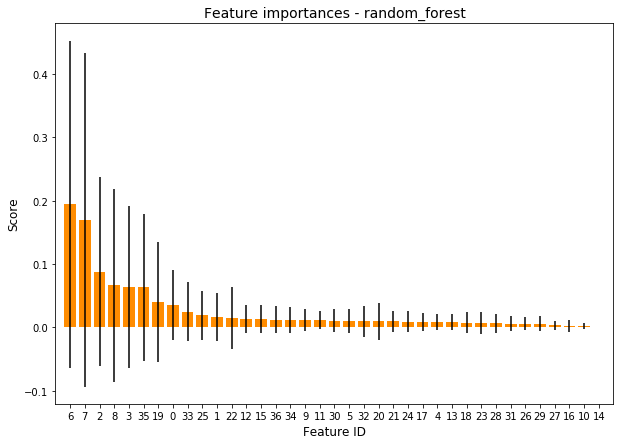

/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


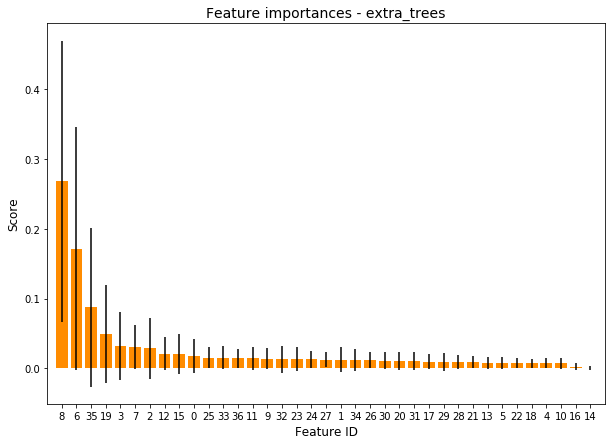

/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [50]:
scores = OrderedDict()  # to save [accuracy, precision, recall, f1-score, rmse]
target_names = ['Class 0', 'Class 1']

# set output file for results backup and perform experiments
# std = sys.stdout
# report = open('learning_full_report.txt', 'wb') 
# sys.stdout = report

with open('learning_full_report.txt', 'w') as f:
    
    for model_name in models.keys():
        print("#############################\n", file=f, flush=True)
        print("Model: {}\n".format(model_name), file=f, flush=True)
        # select model and tuned_parameters
        model = models[model_name]
        tuned_parameters = parameters[model_name]

        if model_name in ['dummy_class']:
            X_converted, y_converted = check_X_y(X_train, y_train)
            model.fit(X_converted, y_converted)

            y_test_pred = model.predict(X_test)
            score = model.score(X_test, y_test)
            rmse =  np.sqrt(mean_squared_error(y_test, y_test_pred))
            print("Accuracy score: {}\n".format(score), file=f)
            print(classification_report(y_test, y_test_pred, target_names=target_names), file=f)
            scores[model_name] = [score, 
                                  metrics.precision_score(y_test, y_test_pred), 
                                  metrics.recall_score(y_test, y_test_pred), 
                                  metrics.f1_score(y_test, y_test_pred), 
                                  rmse]
            if save_results:
                joblib.dump(model, model_name +'.pkl')

        elif model_name in ['logistic_regression']:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)

            score = model.score(X_test, y_test)
            rmse =  np.sqrt(mean_squared_error(y_test, y_test_pred))
            print("Accuracy score: {}\n".format(score), file=f)
            print(classification_report(y_test, y_test_pred, target_names=target_names), file=f)
            scores[model_name] = [score, 
                                  metrics.precision_score(y_test, y_test_pred), 
                                  metrics.recall_score(y_test, y_test_pred), 
                                  metrics.f1_score(y_test, y_test_pred), 
                                  rmse]
            if save_results:
                joblib.dump(model, model_name +'.pkl')

        else:  # Do cross-validation
            print(model.get_params(), file=f)

            # logo = LeaveOneGroupOut()
            # print(logo.get_n_splits(X_train, y_train, groups_train))
            # clf = GridSearchCV(model, tuned_parameters, cv=logo.split(X_train, y_train, groups_train))
            clf = GridSearchCV(model, tuned_parameters)  # 3-fold (default)
            clf.fit(X_train, y_train)

            print("\nBest parameters set found on development set:", file=f)
            print(clf.best_params_, file=f)
            print("\nGrid scores on development set:", file=f)
            means = clf.cv_results_['mean_test_score']
            stds = clf.cv_results_['std_test_score']
            for mean, std, params in zip(means, stds, clf.cv_results_['params']):
                print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params), file=f)

            print("\nDetailed classification report:", file=f)

            print("\nThe model is trained on the full development set.", file=f)
            print("The scores are computed on the full evaluation set.\n", file=f)

            y_test_pred = clf.predict(X_test)

            score = clf.score(X_test, y_test)
            rmse =  np.sqrt(mean_squared_error(y_test, y_test_pred))
            print("Accuracy score: {}\n".format(score), file=f)
            print(classification_report(y_test, y_test_pred, target_names=target_names), file=f)
            scores[model_name] = [score, 
                                  metrics.precision_score(y_test, y_test_pred), 
                                  metrics.recall_score(y_test, y_test_pred), 
                                  metrics.f1_score(y_test, y_test_pred), 
                                  rmse]
            best_est = clf.best_estimator_
            best_par = clf.best_params_
            if save_results:
                joblib.dump(best_est, model_name +'.pkl')
                
            # features importance
            if model_name in ['extra_trees', 'random_forest']:
                # use best_par to fit new clf
                clf_ft = models[model_name]
                clf_ft.n_estimators = best_par['n_estimators']
                clf_ft.max_depth = best_par['max_depth']
#                 print best_par
#                 print clf_ft.get_params()
                clf_ft.fit(X_train, y_train)
                importances = clf_ft.feature_importances_
                # print importances
                std = np.std([tree.feature_importances_ for tree in clf_ft.estimators_], axis=0)
                indices = np.argsort(importances)[::-1]
                print("Feature ranking:\n", file=f)
                for i in range(10):
                    print("%d. feature #%d (%f)" % (i + 1, indices[i], importances[indices[i]]), "\t", df.columns[indices[i]], file=f)
                if save_results:
                    joblib.dump([importances, std, indices], model_name + '_features_scores.pkl')

                # Plot the feature importances
                plt.figure(figsize=(10, 7))
                plt.title("Feature importances - " + model_name, fontsize=14)
                plt.bar(range(X_train.shape[1]), importances[indices],
                        color="darkorange", yerr=std[indices], align="center")
                plt.xticks(range(X_train.shape[1]), indices)
                plt.xlim([-1, X_train.shape[1]])
                plt.xlabel("Feature ID", fontsize=12)
                plt.ylabel("Score", fontsize=12)
                plt.savefig(model_name + '_ft_importance.png')
                plt.show()
                
        # For all models: 
        cm = metrics.confusion_matrix(y_test, y_test_pred)
        print("\nConfusion matrix: ", file=f)
        print("{}\n".format(cm), file=f)

        if plot == 1 :
            plt.figure(figsize=(3,3))
            cm = cm.astype('float')*100 / cm.sum(axis=1)[:, np.newaxis]  # normalized
            sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
            plt.ylabel('Actual label');
            plt.xlabel('Predicted label');
            all_sample_title = 'Accuracy Score: {0}'.format(score)
            plt.title(all_sample_title, size = 15);

            plt.show()       
f.close()
        
# sys.stdout = std         
# report.close()

In [51]:
# Save classification performance: 
if save_results:
    joblib.dump(scores, 'clf_scores.pkl')
# load as
# scores = joblib.load('clf_scores.pkl')

In [53]:
print(scores)

OrderedDict([('dummy_class', [0.5930851063829787, 0.6719367588932806, 0.7083333333333334, 0.6896551724137931, 0.6378988114246814]), ('logistic_regression', [0.9042553191489362, 0.8923076923076924, 0.9666666666666667, 0.928, 0.309426373877638]), ('svc', [0.9095744680851063, 0.905511811023622, 0.9583333333333334, 0.9311740890688259, 0.30070838351282064]), ('random_forest', [0.9388297872340425, 0.9539748953974896, 0.95, 0.9519832985386221, 0.24732612633112064]), ('extra_trees', [0.9468085106382979, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.23063280200722128]), ('neural_network', [0.8670212765957447, 0.841726618705036, 0.975, 0.9034749034749034, 0.3646624787447364])])


In [54]:
scores_df = pd.DataFrame.from_dict(scores, orient='index')
scores_df.columns=['accuracy', 'precision', 'recall', 'f1-score', 'rmse']
scores_df

,accuracy,precision,recall,f1-score,rmse
dummy_class,0.593085,0.671937,0.708333,0.689655,0.637899
logistic_regression,0.904255,0.892308,0.966667,0.928000,0.309426
svc,0.909574,0.905512,0.958333,0.931174,0.300708
random_forest,0.938830,0.953975,0.950000,0.951983,0.247326
extra_trees,0.946809,0.958333,0.958333,0.958333,0.230633
neural_network,0.867021,0.841727,0.975000,0.903475,0.364662


In [55]:
print(scores_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  accuracy &  precision &    recall &  f1-score &      rmse \\
\midrule
dummy\_class         &  0.593085 &   0.671937 &  0.708333 &  0.689655 &  0.637899 \\
logistic\_regression &  0.904255 &   0.892308 &  0.966667 &  0.928000 &  0.309426 \\
svc                 &  0.909574 &   0.905512 &  0.958333 &  0.931174 &  0.300708 \\
random\_forest       &  0.938830 &   0.953975 &  0.950000 &  0.951983 &  0.247326 \\
extra\_trees         &  0.946809 &   0.958333 &  0.958333 &  0.958333 &  0.230633 \\
neural\_network      &  0.867021 &   0.841727 &  0.975000 &  0.903475 &  0.364662 \\
\bottomrule
\end{tabular}



### Experiments logs